In [1]:
# !pip install pandas
# !pip install numpy
# !pip install matplotlib
# !pip install scipy
# !pip install spacy

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy

import os
from random import randint

import spacy
from spacy import displacy

In [2]:
base_path = "../feedback-challenge/feedback-prize-2021/"

In [3]:
train_path = os.path.join(base_path, "train.csv")

In [4]:
df = pd.read_csv(train_path)
df

,id,discourse_id,discourse_start,discourse_end,discourse_text,discourse_type,discourse_type_num,predictionstring
0,423A1CA112E2,1.622628e+12,8.0,229.0,Modern humans today are always on their phone....,Lead,Lead 1,1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 1...
1,423A1CA112E2,1.622628e+12,230.0,312.0,They are some really bad consequences when stu...,Position,Position 1,45 46 47 48 49 50 51 52 53 54 55 56 57 58 59
2,423A1CA112E2,1.622628e+12,313.0,401.0,Some certain areas in the United States ban ph...,Evidence,Evidence 1,60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75
3,423A1CA112E2,1.622628e+12,402.0,758.0,"When people have phones, they know about certa...",Evidence,Evidence 2,76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 9...
4,423A1CA112E2,1.622628e+12,759.0,886.0,Driving is one of the way how to get around. P...,Claim,Claim 1,139 140 141 142 143 144 145 146 147 148 149 15...
...,...,...,...,...,...,...,...,...
144288,4C471936CD75,1.618153e+12,2234.0,3203.0,if I'm not sure what college I want to attend...,Evidence,Evidence 2,386 387 388 389 390 391 392 393 394 395 396 39...
144289,4C471936CD75,1.618153e+12,3221.0,4509.0,seeking multiple opinions before making a har...,Evidence,Evidence 3,576 577 578 579 580 581 582 583 584 585 586 58...
144290,4C471936CD75,1.618025e+12,4510.0,4570.0,it is better to seek multiple opinions instead...,Position,Position 1,828 829 830 831 832 833 834 835 836 837 838
144291,4C471936CD75,1.618025e+12,4570.0,4922.0,The impact of asking people to help you make a...,Evidence,Evidence 4,839 840 841 842 843 844 845 846 847 848 849 85...


In [244]:
dfx = pd.get_dummies(df, columns=["discourse_type"]).groupby(["id"], as_index=False).sum()
cols = [c for c in dfx.columns if c.startswith("discourse_type_") or c == "id" and c != "discourse_type_num"]
dfx = dfx[cols]
dfx

,id,discourse_type_Claim,discourse_type_Concluding Statement,discourse_type_Counterclaim,discourse_type_Evidence,discourse_type_Lead,discourse_type_Position,discourse_type_Rebuttal
0,0000D23A521A,1,1,1,3,0,1,1
1,00066EA9880D,3,1,0,3,1,1,0
2,000E6DE9E817,5,1,1,3,0,1,1
3,001552828BD0,4,0,0,4,1,1,0
4,0016926B079C,7,0,0,3,0,1,0
...,...,...,...,...,...,...,...,...
15589,FFF1442D6698,2,1,1,3,1,1,1
15590,FFF1ED4F8544,5,0,0,2,1,1,0
15591,FFF868E06176,3,1,0,3,1,1,0
15592,FFFD0AF13501,4,1,0,2,0,1,0


In [51]:
def clean_text(text):
    import unicodedata
    filter = ''.join([chr(i) for i in range(1, 32)])
    text = text.translate(str.maketrans('', '', filter))
    text = unicodedata.normalize("NFKD", text)
    return text

def get_file_text(file_id):
    id_txt = file_id + ".txt" 
    file_path = os.path.join(base_path, "train", id_txt)
    text = open(file_path).read()
    return text

In [232]:
samp_id = dfx["id"][0]

In [243]:
samp_text = get_file_text(samp_id)
print(samp_text)

Some people belive that the so called "face" on mars was created by life on mars. This is not the case. The face on Mars is a naturally occuring land form called a mesa. It was not created by aliens, and there is no consiracy to hide alien lifeforms on mars. There is no evidence that NASA has found that even suggests that this face was created by aliens.

A mesa is a naturally occuring rock formation, that is found on Mars and Earth. This "face" on mars only looks like a face because humans tend to see faces wherever we look, humans are obviously extremely social, which is why our brain is designed to recognize faces.

Many conspiracy theorists believe that NASA is hiding life on Mars from the rest of the world. These people would be very wrong. If NASA found life on Mars, then they would get millions of people's attention. NASA's budget would increase drasticly, which means that their workers would get paid more. There is no good reason that NASA would hide life on Mars from the rest 

In [234]:
samp_df = df[df["id"] == samp_id].sort_values("discourse_start")

In [236]:
samp_df

,id,discourse_id,discourse_start,discourse_end,discourse_text,discourse_type,discourse_type_num,predictionstring
59951,0000D23A521A,1.617735e+12,0.0,170.0,"Some people belive that the so called ""face"" o...",Position,Position 1,0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18...
59952,0000D23A521A,1.617735e+12,170.0,357.0,"It was not created by aliens, and there is no ...",Evidence,Evidence 1,34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 4...
59953,0000D23A521A,1.617735e+12,358.0,438.0,"A mesa is a naturally occuring rock formation,...",Evidence,Evidence 2,69 70 71 72 73 74 75 76 77 78 79 80 81 82 83
59954,0000D23A521A,1.617735e+12,438.0,626.0,"This ""face"" on mars only looks like a face bec...",Claim,Claim 1,84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 9...
59955,0000D23A521A,1.617735e+12,627.0,722.0,Many conspiracy theorists believe that NASA is...,Counterclaim,Counterclaim 1,117 118 119 120 121 122 123 124 125 126 127 12...
59956,0000D23A521A,1.617735e+12,722.0,836.0,These people would be very wrong. If NASA foun...,Rebuttal,Rebuttal 1,134 135 136 137 138 139 140 141 142 143 144 14...
59957,0000D23A521A,1.617735e+12,836.0,1014.0,"NASA's budget would increase drasticly, which ...",Evidence,Evidence 3,154 155 156 157 158 159 160 161 162 163 164 16...
59958,0000D23A521A,1.617735e+12,1015.0,1343.0,"So, NASA is not hiding life on Mars from us, a...",Concluding Statement,Concluding Statement 1,186 187 188 189 190 191 192 193 194 195 196 19...


Text(0.5, 0, 'Count')

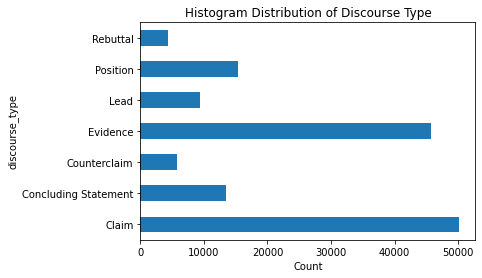

In [238]:
fig, ax = plt.subplots()
df.groupby('discourse_type').size().plot.barh()
plt.title("Histogram Distribution of Discourse Type")
plt.xlabel("Count")

In [97]:
unique_labels = list(df["discourse_type"].unique())
color_options = ['#%06X' % randint(0, 0xFFFFFF) for i in range(len(unique_labels))]
colors = {label:col for label, col in zip(unique_labels, color_options)}
colors

['Lead',
 'Position',
 'Evidence',
 'Claim',
 'Concluding Statement',
 'Counterclaim',
 'Rebuttal']

In [150]:
# Credits for this part of visualisation --> https://www.kaggle.com/thedrcat
def visualize(example, df):
    ents = []
    for i, row in df[df['id'] == example].iterrows():
        ents.append({
                        'start': int(row['discourse_start']), 
                         'end': int(row['discourse_end']), 
                         'label': row['discourse_type']
                    })
    
    print(row["id"])
    data = get_file_text(row["id"])
    doc2 = {
                "text": data,
                "ents": ents,
                "title": example
            }

    options = {"ents": df.discourse_type.unique().tolist(), "colors": colors}
    displacy.render(doc2, style="ent", options=options, manual=True, jupyter=True)

In [152]:
ex_id = df['id'].sample(n=1, random_state=64).values.tolist()
for ex in ex_id:
    visualize(ex,df)

F3A94AC4FD8E
